In [1]:
import os,sys
#sys.path.append('/work/qdiff/mo_utils')

In [3]:
from mo_utils.utils.tmux_utils import get_session_list,tmux_session,get_session_name,kill_session
from pathlib import Path

libtmux not installed ??


In [4]:

w8bit_nosym = '/fastdata/users/nadavg/sd/qdiff/output_quantization/2025-01-22-16-39-34/wc_ckpt.pth'
w8bit_sym = "/fastdata/users/nadavg/sd/qdiff/output_quantization/2025-01-22-16-40-17/wc_ckpt.pth"


In [5]:
get_session_list()

[Session($3 sd_eval_wb=4_sw=False_qa=False_gpu_5),
 Session($0 sd_quantize_wb=8_gpu_3),
 Session($1 sd_quantize_wb=8_gpu_7)]

In [26]:
kill_session()

before kill sessions=[Session($0 sd_eval_wb=4_sw=False_qa=False_gpu_5), Session($1 sd_eval_wb=8_sw=False_qa=False_gpu_5)]
after kill sessions=[]


In [13]:
#prompt = "a puppy wearing a hat" 
task = "eval"
prompt = "a puppy wearing a hat" 
weight_bit = 4
outdir= "output_pupy"
symmetric_weight = False
quant_act = False
quantized_ckpt_path = '/fastdata/users/nadavg/sd/qdiff/sd_w4a8_ckpt.pth'

In [27]:
#prompt = "a puppy wearing a hat" 
task = "eval"
prompt = "a puppy wearing a hat" 
weight_bit = 8
outdir= "output_pupy"
symmetric_weight = False
quant_act = False
quantized_ckpt_path = '/fastdata/users/nadavg/sd/qdiff/sd_w8a8_ckpt.pth'

In [39]:
#prompt = "a puppy wearing a hat" 
task = "eval"
prompt = "a puppy wearing a hat" 
weight_bit = 8
outdir= "output_pupy"
quant_act = False

#symmetric_weight = False
#quantized_ckpt_path = w8bit_nosym

symmetric_weight = True
quantized_ckpt_path = w8bit_sym


In [40]:
cmd = (f"python scripts/txt2img.py --prompt '{prompt}' --plms --cond --ptq --weight_bit {weight_bit} --quant_mode qdiff "+
        f"--no_grad_ckpt --split --n_samples 5 --resume " + 
        quant_act*"--quant_act "+
        f"--act_bit 8 --sm_abit 16 --outdir {outdir} --cali_ckpt {quantized_ckpt_path} "+
        symmetric_weight*"--symmetric_weight "
        )

print(cmd)

python scripts/txt2img.py --prompt 'a puppy wearing a hat' --plms --cond --ptq --weight_bit 8 --quant_mode qdiff --no_grad_ckpt --split --n_samples 5 --resume --act_bit 8 --sm_abit 16 --outdir output_pupy --cali_ckpt /fastdata/users/nadavg/sd/qdiff/output_quantization/2025-01-22-16-40-17/wc_ckpt.pth --symmetric_weight 


In [41]:
gpu = 5 

In [42]:
inst_list = [f'cd {Path.home() / "q-diffusion"}',
             f'conda activate qdiff',
             f'export CUDA_VISIBLE_DEVICES={gpu}',
             cmd]

In [43]:
sess_name = get_session_name(f'sd_{task}_wb={weight_bit}_sw={symmetric_weight}_qa={quant_act}_gpu_{gpu}')
sess_name

'sd_eval_wb=8_sw=True_qa=False_gpu_5'

In [44]:
tmux_session(sess_name,inst_list)

tmux attach -t "sd_eval_wb=8_sw=True_qa=False_gpu_5"


'sd_eval_wb=8_sw=True_qa=False_gpu_5'

In [37]:
kill_session(kill_only=sess_name)

before kill sessions=[Session($0 sd_eval_wb=8_sw=False_qa=False_gpu_5)]
after kill sessions=[]


In [84]:
task = 'quantize'
gpu = 6
prompt = "an astronaut riding a unicorn in space" 
weight_bit = 8
symmetric_weight = False
resume_w = False
bs = 8
outdir= "output_quantization"
quantized_ckpt_path = '/fastdata/users/nadavg/sd/qdiff/sd_w8a8_ckpt.pth'
cali_data_path='/fastdata/users/nadavg/sd/qdiff/sd_coco-s75_sample1024_allst.pt'

In [92]:
task = 'quantize'
gpu = 7
prompt = "an astronaut riding a unicorn in space" 
weight_bit = 8
symmetric_weight = True
bs = 8
outdir= "output_quantization"
resume_w = False
quantized_ckpt_path = '/home/nadavg/q-diffusion/output_quantization/8bit_sym/wc_ckpt.pth'
cali_data_path='/fastdata/users/nadavg/sd/qdiff/sd_coco-s75_sample1024_allst.pt'

In [99]:
task = 'quantize'
gpu = 2
prompt = "an astronaut riding a unicorn in space" 
weight_bit = 4
symmetric_weight = False
bs = 8
outdir= "output_quantization"
resume_w = False
quantized_ckpt_path = '/home/nadavg/q-diffusion/output_quantization/2025-01-19-18-27-17/wc_ckpt.pth'
cali_data_path= '/fastdata/users/nadavg/sd/qdiff/sd_coco-s75_sample1024_allst.pt'

In [100]:
cmd=(f"python scripts/txt2img.py --prompt '{prompt}' --plms --cond --ptq --weight_bit {weight_bit} --quant_mode qdiff "+
    f"--quant_act --act_bit 8 --cali_st 25 --cali_batch_size {bs} --cali_n 128 --no_grad_ckpt --split --running_stat "+
    f"--sm_abit 16 --cali_data_path {cali_data_path} --outdir {outdir}"+
    symmetric_weight*" --symmetric_weight "+
    resume_w*f"--resume_w --cali_ckpt {quantized_ckpt_path}"
    )


In [101]:
cmd


"python scripts/txt2img.py --prompt 'an astronaut riding a unicorn in space' --plms --cond --ptq --weight_bit 4 --quant_mode qdiff --quant_act --act_bit 8 --cali_st 25 --cali_batch_size 8 --cali_n 128 --no_grad_ckpt --split --running_stat --sm_abit 16 --cali_data_path /fastdata/users/nadavg/sd/qdiff/sd_coco-s75_sample1024_allst.pt --outdir output_quantization"

In [102]:
inst_list = [f'cd {Path.home() / "q-diffusion"}',
             f'conda activate qdiff',
             f'export CUDA_VISIBLE_DEVICES={gpu}',
             cmd]

In [103]:
inst_list

['cd /home/nadavg/q-diffusion',
 'conda activate qdiff',
 'export CUDA_VISIBLE_DEVICES=2',
 "python scripts/txt2img.py --prompt 'an astronaut riding a unicorn in space' --plms --cond --ptq --weight_bit 4 --quant_mode qdiff --quant_act --act_bit 8 --cali_st 25 --cali_batch_size 8 --cali_n 128 --no_grad_ckpt --split --running_stat --sm_abit 16 --cali_data_path /fastdata/users/nadavg/sd/qdiff/sd_coco-s75_sample1024_allst.pt --outdir output_quantization"]

In [104]:
sess_name = get_session_name(f'sd_{task}_wb={weight_bit}_gpu_{gpu}')
sess_name


'sd_quantize_wb=4_gpu_2'

In [105]:
tmux_session(sess_name,inst_list)

tmux attach -t "sd_quantize_wb=4_gpu_2"


'sd_quantize_wb=4_gpu_2'

In [18]:
kill_session(kill_only=sess_name)

before kill sessions=[Session($0 0), Session($6 sd_quantize_wb=4_gpu_6), Session($5 sd_quantize_wb=8_gpu_5)]
after kill sessions=[Session($0 0), Session($6 sd_quantize_wb=4_gpu_6)]


In [21]:
#sess_name = "sd_quantize_wb=8_gpu_7"
kill_session(kill_only=sess_name) 
#(t sess_name)

before kill sessions=[Session($0 0), Session($2 sd_quantize_wb=8_gpu_4)]
after kill sessions=[Session($0 0)]


In [4]:
import sys
sys.executable

'/opt/conda/envs/qdiff_reorg/bin/python'

In [3]:
from mo_utils.utils.torch_utils import torch_to_pt,create_torch_script
import netron

ModuleNotFoundError: No module named 'mo_utils'

In [11]:
from omegaconf import OmegaConf
from txt2img import load_model_from_config
from ldm.models.diffusion.plms import PLMSSampler

In [14]:
config = OmegaConf.load('/work/qdiff/q-diffusion-org/configs/stable-diffusion/v1-inference.yaml')
model = load_model_from_config(config, "/fastdata/users/nadavg/sd/qdiff/sd-v1-4.ckpt")
sampler = PLMSSampler(model)

LatentDiffusion: Running in eps-prediction mode


/opt/conda/envs/qdiff_reorg/lib/python3.8/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/conda/envs/qdiff_reorg/lib/python3.8/site-packages/transformers/modeling_utils.py:371: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted 

x.shape = torch.Size([3, 4, 64, 64])

t.shape = torch.Size([3]) 

c.shape = torch.Size([3, 77, 768])

In [40]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [24]:
x = torch.load('/home/nadavg/q-diffusion/temp/x.pth')

/tmp/ipykernel_1208315/1280224373.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x = torch.load('/home/nadavg/q-diffusion/temp/x.pth')


In [27]:
x.max(),x.min()

(tensor(60571092.), tensor(-49043352.))

In [29]:
delta = (x.max() - x.min()) / (2 ** 8 - 1) 
delta

tensor(429860.5938)

In [31]:
zero_point = (- x.min() / delta).round()
zero_point

tensor(114.)

In [32]:
x_int = torch.round(x / delta)
x_quant = torch.clamp(x_int + zero_point, 0, 256 - 1)
x_float_q = (x_quant - zero_point) * delta

In [34]:
x_float_q.max(),x_float_q.min()

(tensor(60610344.), tensor(-49004108.))

In [36]:
(x_float_q-x).abs().pow(2).mean()


tensor(1.4398e+10)

In [38]:
def plot_hist(x,bins=50,hrange=None,ax=None,normalized = True):
    hx,binx=np.histogram(x,bins=bins,range=hrange)
    if normalized:
        hx = hx/sum(hx)
    centers = (binx[:-1]+binx[1:])/2
    widths = binx[1:]-binx[:-1]
    if ax is None:
        f,ax = plt.subplots()
    ax.bar(centers,hx,width=widths)
    return hx,binx


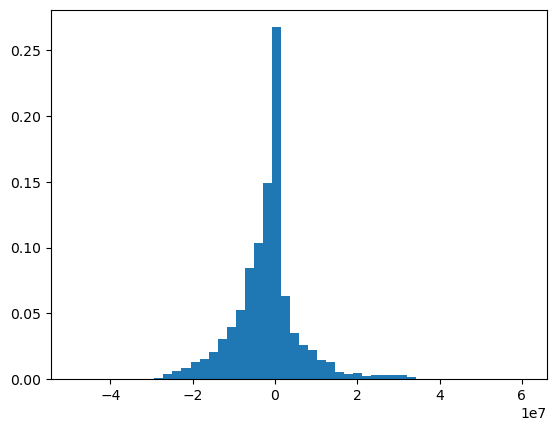

In [42]:
_=plot_hist(x.numpy())

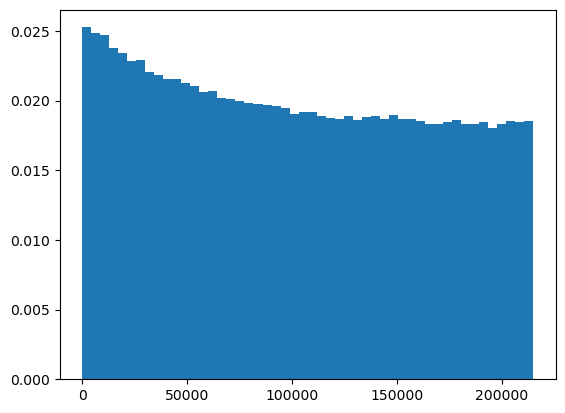

In [45]:
_=plot_hist((x-x_float_q).abs().numpy())

In [47]:
(x-x_float_q).abs().pow(2).mean()

tensor(1.4398e+10)